<a href="https://colab.research.google.com/github/maheravi/Deep-Learning/blob/main/AGE%20prediction%20Usinge%20Image/Age_Prediction_Using_Face_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d jangedoo/utkface-new


 99% 328M/331M [00:02<00:00, 130MB/s]
100% 331M/331M [00:02<00:00, 125MB/s]


In [ ]:
!unzip -qq utkface-new.zip

In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
import os
import cv2
import numpy as np

In [ ]:
epochs = 12
width = height = 224

In [ ]:
images = []
ages = []

for image_name in os.listdir('crop_part1')[0:9000]:
    part = image_name.split('_')
    ages.append(int(part[0]))

    image = cv2.imread(f'crop_part1/{image_name}')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)

In [ ]:
images = pd.Series(images, name= 'Images')
ages = pd.Series(ages, name= 'Ages')

df = pd.concat([images, ages], axis= 1)
df.head()

,Images,Ages
0,"[[[66, 53, 63], [63, 50, 60], [62, 46, 57], [5...",27
1,"[[[91, 80, 76], [71, 60, 56], [47, 35, 35], [3...",43
2,"[[[211, 213, 208], [211, 213, 208], [211, 213,...",24
3,"[[[104, 70, 60], [107, 73, 63], [112, 78, 68],...",3
4,"[[[128, 89, 84], [130, 91, 86], [131, 90, 86],...",91


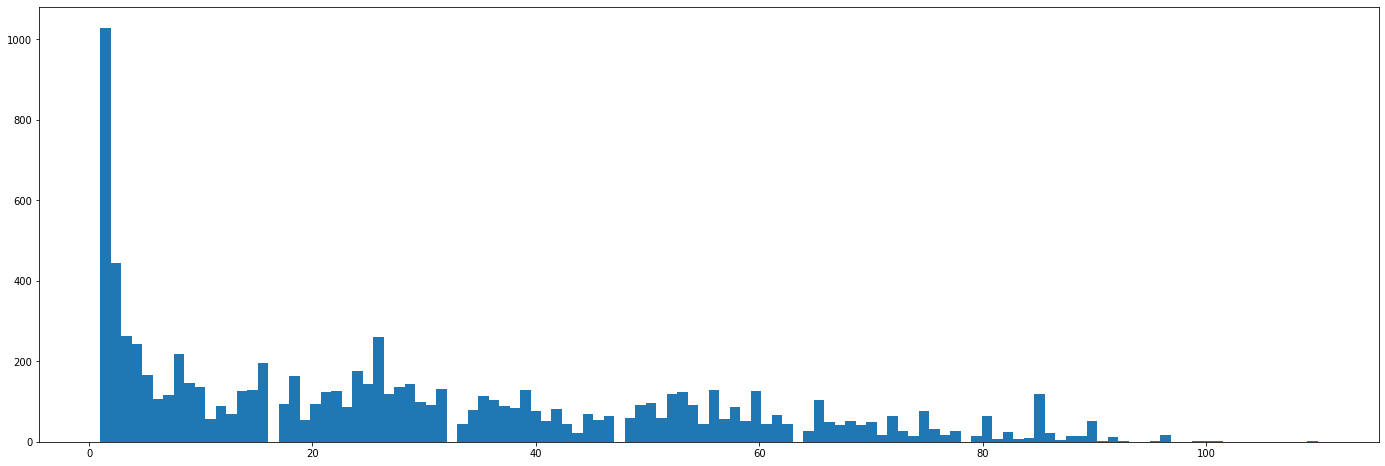

In [ ]:
plt.figure(figsize=(24, 8))
plt.hist(df['Ages'], bins= 116)
plt.show()

In [ ]:
under4 = []

for i in range(len(df)):
    if df['Ages'].iloc[i] <= 4:
        under4.append(df.iloc[i])

under4 = pd.DataFrame(under4)
under4 = under4.sample(frac= 0.3)

up4 = df[df['Ages'] > 4]

df = pd.concat([under4, up4])

In [ ]:
df = df[df['Ages'] < 90]

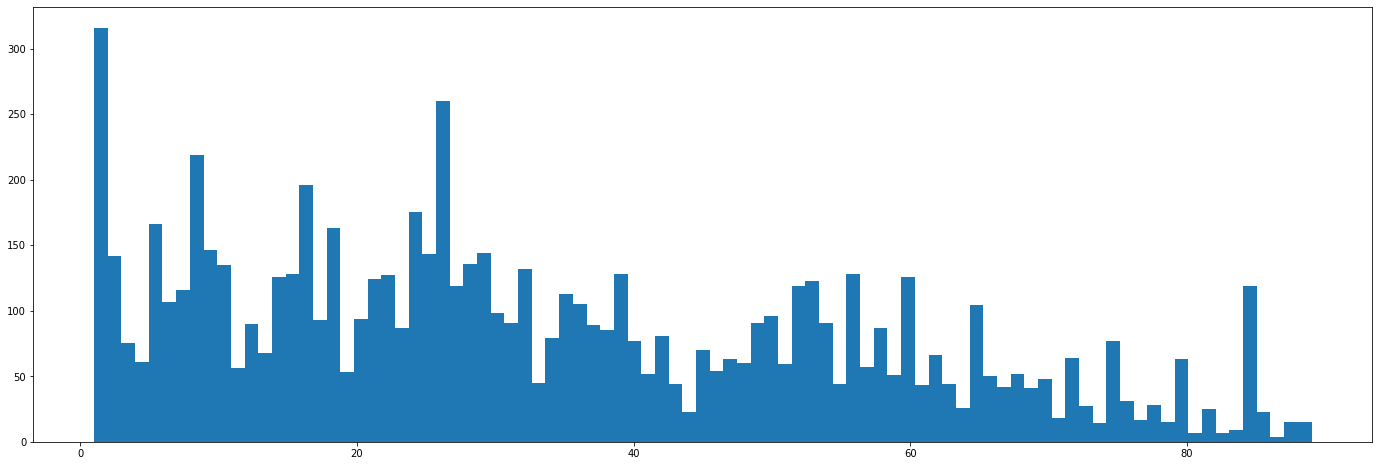

In [ ]:
plt.figure(figsize=(24, 8))
plt.hist(df['Ages'], bins= 89)
plt.show()

In [ ]:
X = []
Y = []

for i in range(len(df)):
    df['Images'].iloc[i] = cv2.resize(df['Images'].iloc[i], (width, height))

    X.append(df['Images'].iloc[i])
    Y.append(df['Ages'].iloc[i])

X = np.array(X)
Y = np.array(Y)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2)

In [ ]:
data_generator = ImageDataGenerator(
                                  rescale = 1./ 255,
                                  horizontal_flip = True
                                  )

train_data = data_generator.flow(X_train,
                                 Y_train,
                                 batch_size= 32)

val_data = data_generator.flow(X_val,
                               Y_val,
                               batch_size= 32)

In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(width, height, 3),
    include_top = False,
    weights = 'imagenet',
    pooling = 'avg'
    )

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers[:-4]:
  layer.trainable = False

In [ ]:
model = tf.keras.models.Sequential([
    base_model,
    Dense(1, activation='relu')                          
])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.mean_squared_error)

In [ ]:
model.fit(train_data,
          validation_data = val_data,
          epochs = epochs
)

Epoch 1/12
188/188 [==============================] - 272s 1s/step - loss: 356.8652 - val_loss: 1905.9962
Epoch 2/12
188/188 [==============================] - 250s 1s/step - loss: 165.9233 - val_loss: 800.6254
Epoch 3/12
188/188 [==============================] - 253s 1s/step - loss: 140.0200 - val_loss: 498.3348
Epoch 4/12
188/188 [==============================] - 258s 1s/step - loss: 125.7414 - val_loss: 262.9617
Epoch 5/12
188/188 [==============================] - 254s 1s/step - loss: 114.6021 - val_loss: 237.3045
Epoch 6/12
188/188 [==============================] - 254s 1s/step - loss: 105.1593 - val_loss: 361.1976
Epoch 7/12
188/188 [==============================] - 258s 1s/step - loss: 101.2909 - val_loss: 180.5868
Epoch 8/12
188/188 [==============================] - 275s 1s/step - loss: 94.2694 - val_loss: 148.2677
Epoch 9/12
188/188 [==============================] - 269s 1s/step - loss: 84.6091 - val_loss: 381.2461
Epoch 10/12
188/188 [==============================] - 2

In [ ]:
model.save('AgePredictionModel.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [1]:
import tensorflow as tf
from tensorflow.python.keras.models import load_model

In [ ]:
!pip install retina-face
!pip install PyTelegramBotAPI==3.8.0

In [14]:
import cv2
from tensorflow.python.keras.models import load_model
import telebot
from retinaface import RetinaFace
bot = telebot.TeleBot('Input Your Token')


@bot.message_handler(content_types=['photo'])
def photo(message):
    print('message.photo =', message.photo)
    fileID = message.photo[-1].file_id
    print('fileID =', fileID)
    file_info = bot.get_file(fileID)
    print('file.file_path =', file_info.file_path)
    downloaded_file = bot.download_file(file_info.file_path)

    with open(f"{fileID}.jpg", 'wb') as new_file:
        new_file.write(downloaded_file)

    model = load_model('/content/AgePredictionModel.h5')

    image = cv2.imread(f"{fileID}.jpg")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    faces = RetinaFace.extract_faces(image, align=True)

    for face in faces:
        face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        image = cv2.resize(face, (224, 224))
        image = image / 255
        image = image.reshape(1, 224, 224, 3)

        pred = model.predict([image])

        bot.reply_to(message, pred)


@bot.message_handler(commands=['start'])
def say_hello(message):
    bot.send_message(message.chat.id, f'wellcome {message.from_user.first_name} Joonz')


@bot.message_handler(func=lambda message: True)
def send_unknown(message):
    bot.reply_to(message, 'نمیفهمم چی میگی یره!')


bot.polling()

message.photo = [<telebot.types.PhotoSize object at 0x7fd020ae7e50>, <telebot.types.PhotoSize object at 0x7fd0202a9b50>, <telebot.types.PhotoSize object at 0x7fd0202a9d50>]
fileID = AgACAgQAAxkBAAIBV2FTBJJ8Q-Olslf_g4FkGs9Bqt5AAAL8tjEb1SeZUtjPhVXL8LGcAQADAgADeAADIQQ
file.file_path = photos/file_89.jpg
Directory  /root /.deepface created
Directory  /root /.deepface/weights created
retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:04<00:00, 25.9MB/s]


message.photo = [<telebot.types.PhotoSize object at 0x7fd019cf0850>, <telebot.types.PhotoSize object at 0x7fd01b65aa90>, <telebot.types.PhotoSize object at 0x7fd019d2dd50>]
fileID = AgACAgQAAxkBAAIBWWFTBL1hSIULO74vpw5sLZ8Xjs7PAAL9tjEb1SeZUg7idNH9ukRpAQADAgADeAADIQQ
file.file_path = photos/file_90.jpg
message.photo = [<telebot.types.PhotoSize object at 0x7fd019930410>, <telebot.types.PhotoSize object at 0x7fd019179810>, <telebot.types.PhotoSize object at 0x7fd019179cd0>]
fileID = AgACAgQAAxkBAAIBW2FTBPjMseHyxu7pIjLF1jTeK2dgAAIKtzEb1SeZUl38uWNYcB3aAQADAgADeAADIQQ
file.file_path = photos/file_91.jpg
